# ShadowFox Advanced Level Task 2

# Covid-19 Data Analysis

## 1. Finding a Dataset.

## 2. Dataset Exploration.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd        #Giving alies pd to Pandas library

url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_data=pd.read_csv(url)

print(covid_data)

    Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  \
0          0 

In [3]:
covid_data["Province/State"].fillna("",inplace = True)   #Replace Nans

covid_long = covid_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                             var_name='Date', 
                             value_name='Confirmed')

covid_long['Date'] = pd.to_datetime(covid_long['Date'])    #Convert to long format

# Display the transformed data
covid_long

C:\Users\KPK\AppData\Local\Temp\ipykernel_15084\2363080093.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_long['Date'] = pd.to_datetime(covid_long['Date'])    #Convert to long format


,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,,Afghanistan,33.939110,67.709953,2020-01-22,0
1,,Albania,41.153300,20.168300,2020-01-22,0
2,,Algeria,28.033900,1.659600,2020-01-22,0
3,,Andorra,42.506300,1.521800,2020-01-22,0
4,,Angola,-11.202700,17.873900,2020-01-22,0
...,...,...,...,...,...,...
330322,,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,,Yemen,15.552727,48.516388,2023-03-09,11945
330325,,Zambia,-13.133897,27.849332,2023-03-09,343135


In [4]:
print(covid_long.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  330327 non-null  object        
 1   Country/Region  330327 non-null  object        
 2   Lat             328041 non-null  float64       
 3   Long            328041 non-null  float64       
 4   Date            330327 non-null  datetime64[ns]
 5   Confirmed       330327 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 15.1+ MB
None


# 3. Research Question

# 4. Visualization / Visual Presentation

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Trend of Covid 19 globally

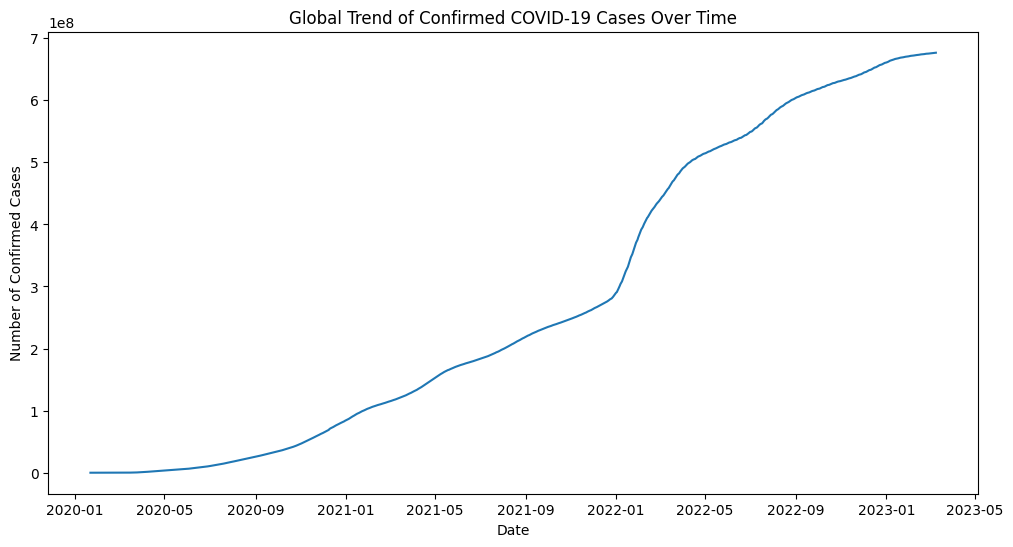

In [7]:
# Import required libraries with aliases.
import matplotlib.pyplot as plt
import seaborn as sns

global_cases = covid_long.groupby('Date')['Confirmed'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_cases, x='Date', y='Confirmed')
plt.title('Global Trend of Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.show()

### Trend of Covid 19 for specific country

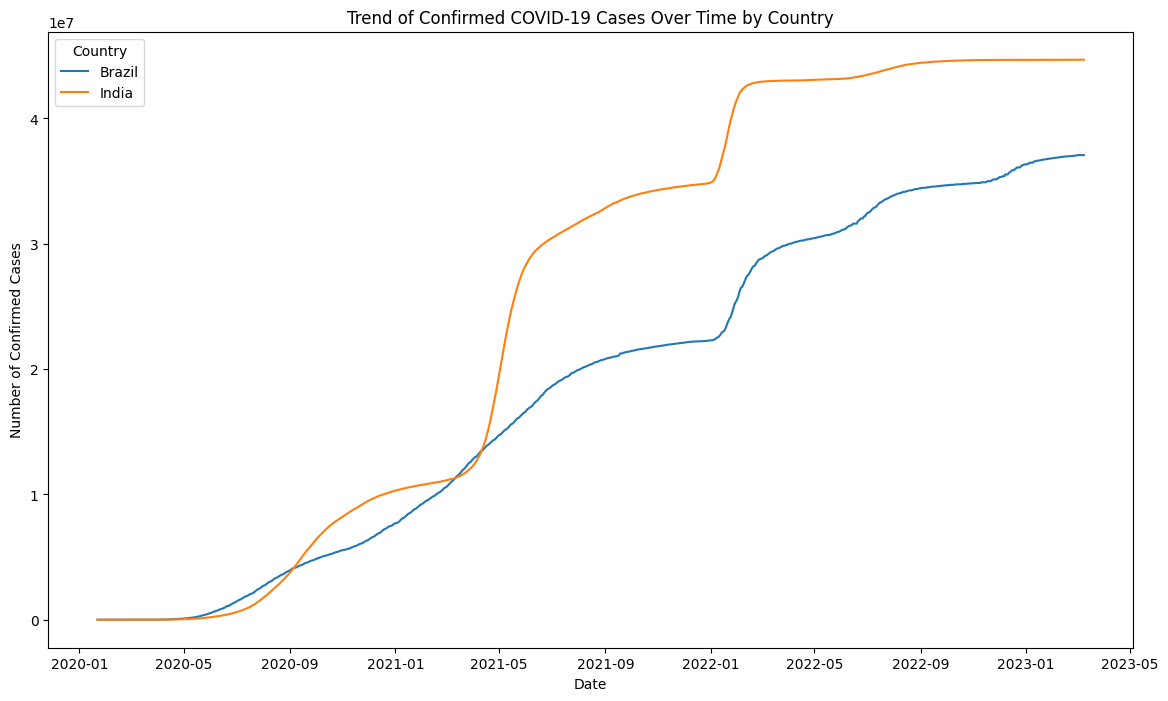

In [8]:
countries = ['India', "Brazil"]
country_cases = covid_long[covid_long['Country/Region'].isin(countries)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=country_cases, x='Date', y='Confirmed', hue='Country/Region')
plt.title('Trend of Confirmed COVID-19 Cases Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend(title='Country')
plt.show()

# 5. Conclusions (Insights)